In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from google.colab import files # Import files from google.colab

# Upload file
uploaded = files.upload()

# Load dataset
df = pd.read_csv("Titanic-Dataset.csv")

# Display first 5 rows
df.head()

Saving Titanic-Dataset.csv to Titanic-Dataset (4).csv


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [52]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [53]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [54]:

df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(columns=['Cabin'], inplace=True)
df.isnull().sum()


/tmp/ipython-input-4082519568.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/tmp/ipython-input-4082519568.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or d

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [55]:

df['Sex'] = df['Sex'].map({'male':0, 'female':1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,False,False
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,False,True
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,False,True


In [56]:

scaler = StandardScaler()
df[['Age','Fare']] = scaler.fit_transform(df[['Age','Fare']])
df[['Age','Fare']].head()


,Age,Fare
0,-0.565736,-0.502445
1,0.663861,0.786845
2,-0.258337,-0.488854
3,0.433312,0.420730
4,0.433312,-0.486337


In [57]:

def remove_outliers(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    return data[(data[col] >= lower) & (data[col] <= upper)]

df = remove_outliers(df, 'Age')
df = remove_outliers(df, 'Fare')
df.shape


(718, 12)

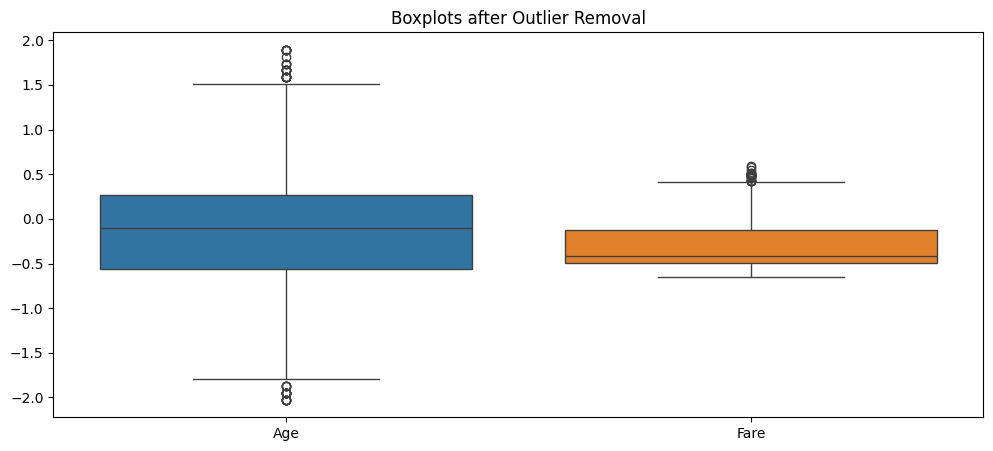

In [58]:

plt.figure(figsize=(12,5))
sns.boxplot(data=df[['Age','Fare']])
plt.title("Boxplots after Outlier Removal")
plt.show()

In [59]:
print("Shape:", df.shape)
print(df.info())

# Check missing values
df.isnull().sum()


Shape: (718, 12)
<class 'pandas.core.frame.DataFrame'>
Index: 718 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  718 non-null    int64  
 1   Survived     718 non-null    int64  
 2   Pclass       718 non-null    int64  
 3   Name         718 non-null    object 
 4   Sex          718 non-null    int64  
 5   Age          718 non-null    float64
 6   SibSp        718 non-null    int64  
 7   Parch        718 non-null    int64  
 8   Ticket       718 non-null    object 
 9   Fare         718 non-null    float64
 10  Embarked_Q   718 non-null    bool   
 11  Embarked_S   718 non-null    bool   
dtypes: bool(2), float64(2), int64(6), object(2)
memory usage: 63.1+ KB
None


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [60]:
# Select numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Compute summary stats
summary_stats = df[numeric_cols].describe().T
summary_stats['median'] = df[numeric_cols].median()
summary_stats['mode'] = df[numeric_cols].mode().iloc[0]
summary_stats

,count,mean,std,min,25%,50%,75%,max,median,mode
PassengerId,718.0,447.883008,259.549777,1.000000,220.250000,447.500000,673.500000,891.000000,447.500000,1.000000
Survived,718.0,0.334262,0.472061,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
Pclass,718.0,2.512535,0.715818,1.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000
Sex,718.0,0.318942,0.466391,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
Age,718.0,-0.098537,0.769449,-2.025883,-0.565736,-0.104637,0.270006,1.893459,-0.104637,-0.104637
SibSp,718.0,0.413649,0.855001,0.000000,0.000000,0.000000,1.000000,5.000000,0.000000,0.000000
Parch,718.0,0.317549,0.784792,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000
Fare,718.0,-0.302242,0.266674,-0.648422,-0.489568,-0.411839,-0.126366,0.587429,-0.411839,-0.486337


In [61]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
count,718.000000,718.000000,718.000000,718,718.000000,718.000000,718.000000,718.000000,718,718.000000,718,718
unique,NaN,NaN,NaN,718,NaN,NaN,NaN,NaN,598,NaN,2,2
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",NaN,NaN,NaN,NaN,1601,NaN,False,True
freq,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,7,NaN,647,543
mean,447.883008,0.334262,2.512535,NaN,0.318942,-0.098537,0.413649,0.317549,NaN,-0.302242,NaN,NaN
std,259.549777,0.472061,0.715818,NaN,0.466391,0.769449,0.855001,0.784792,NaN,0.266674,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,0.000000,-2.025883,0.000000,0.000000,NaN,-0.648422,NaN,NaN
25%,220.250000,0.000000,2.000000,NaN,0.000000,-0.565736,0.000000,0.000000,NaN,-0.489568,NaN,NaN
50%,447.500000,0.000000,3.000000,NaN,0.000000,-0.104637,0.000000,0.000000,NaN,-0.411839,NaN,NaN
75%,673.500000,1.000000,3.000000,NaN,1.000000,0.270006,1.000000,0.000000,NaN,-0.126366,NaN,NaN


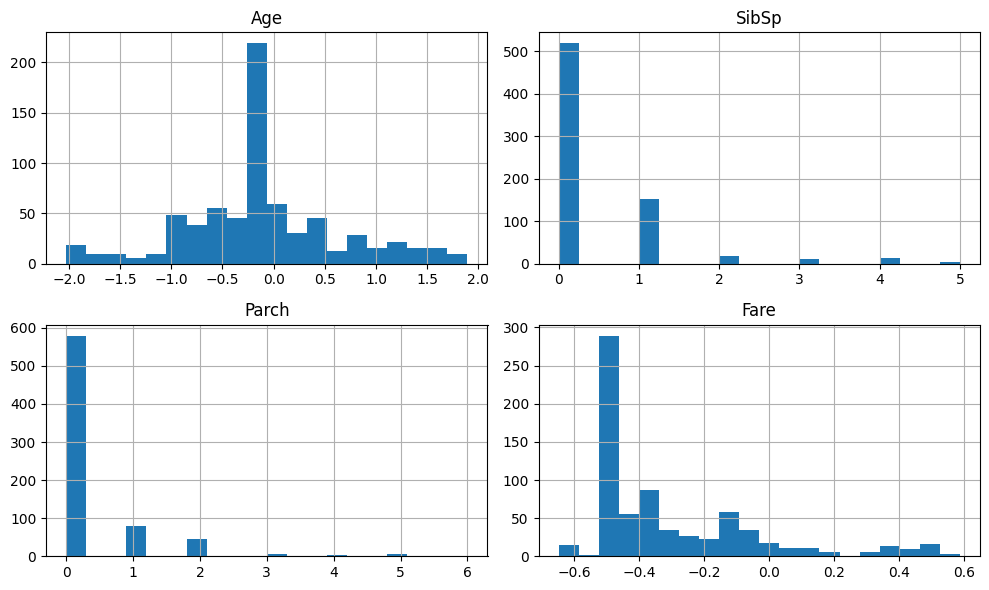

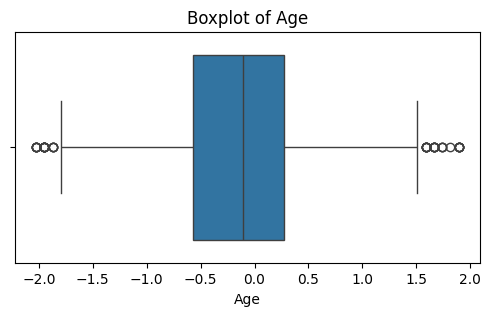

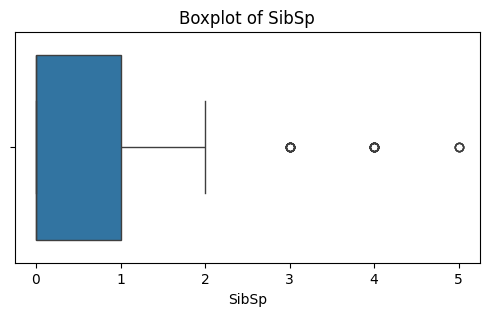

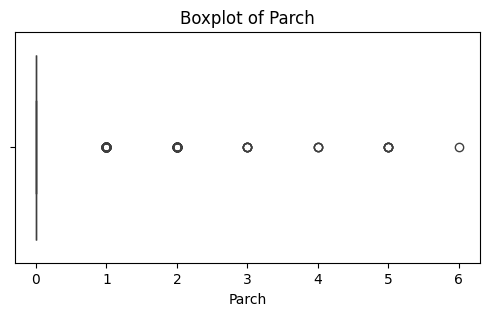

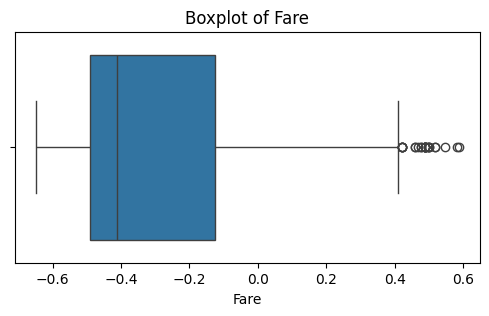

In [62]:
numeric_features = ['Age', 'SibSp', 'Parch', 'Fare']

# Histograms
df[numeric_features].hist(figsize=(10,6), bins=20)
plt.tight_layout()
plt.show()

# Boxplots
for col in numeric_features:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


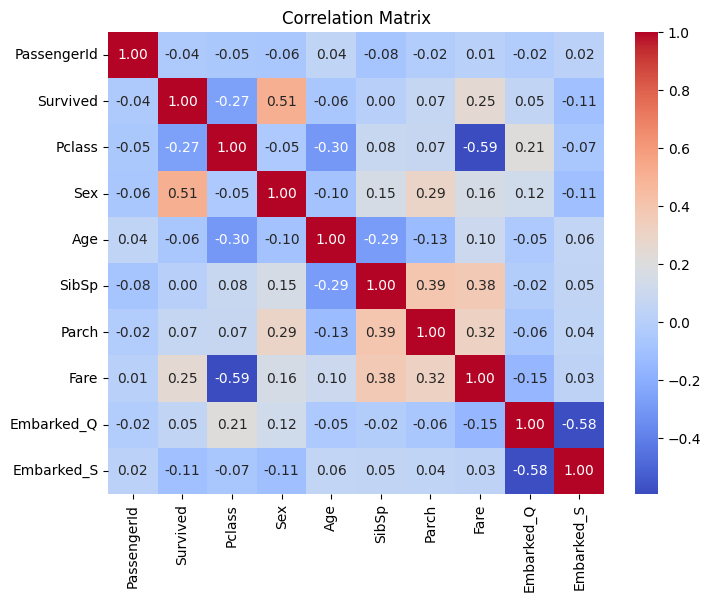

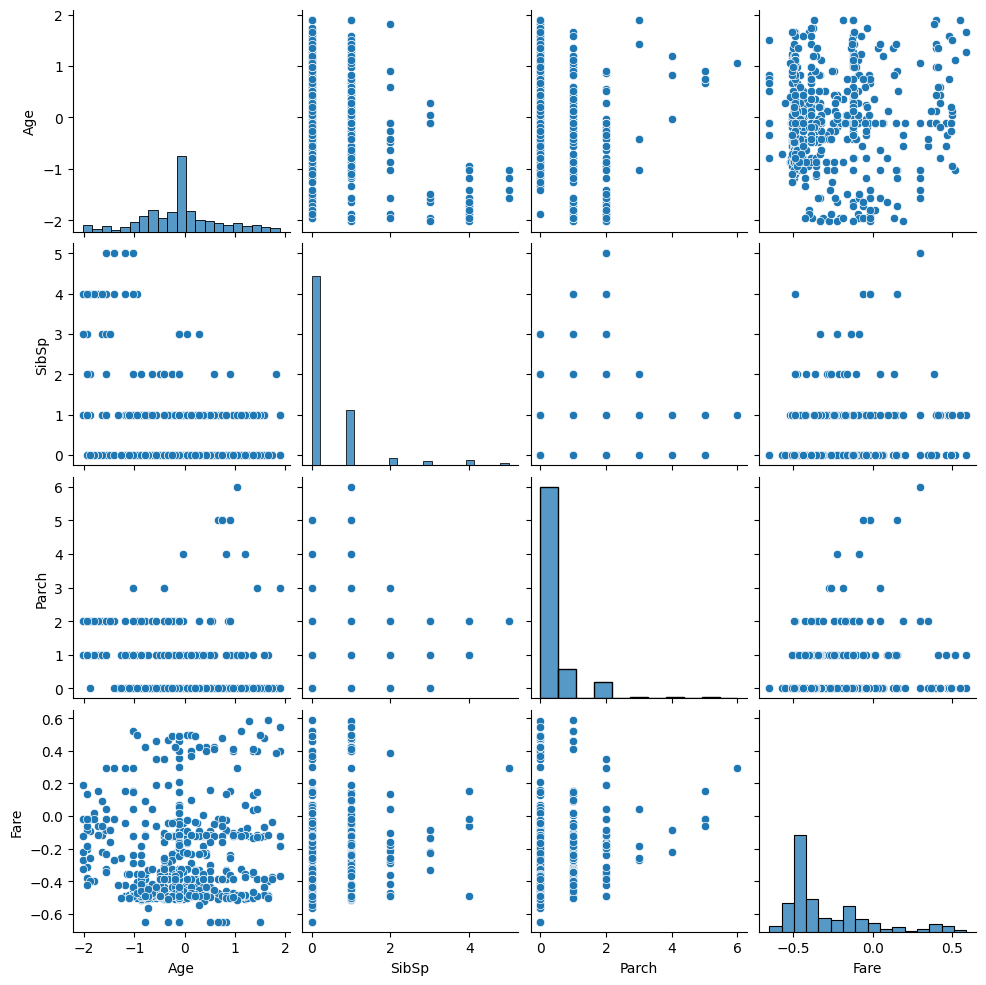

In [63]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

sns.pairplot(df[numeric_features])
plt.show()

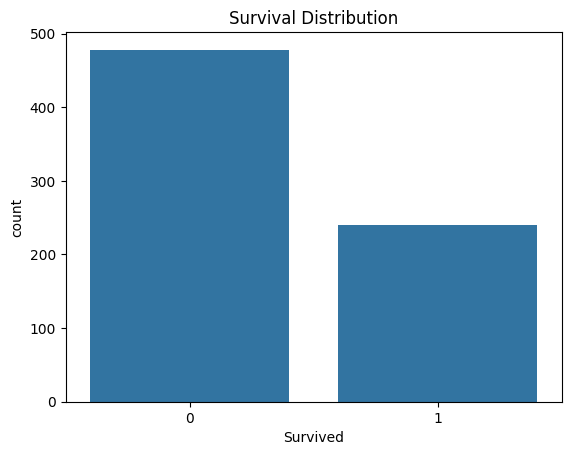

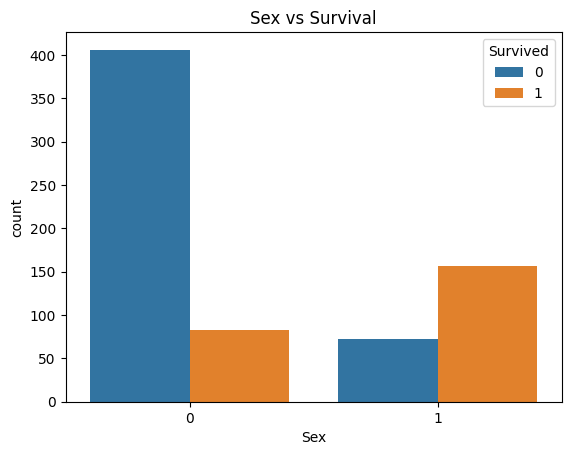

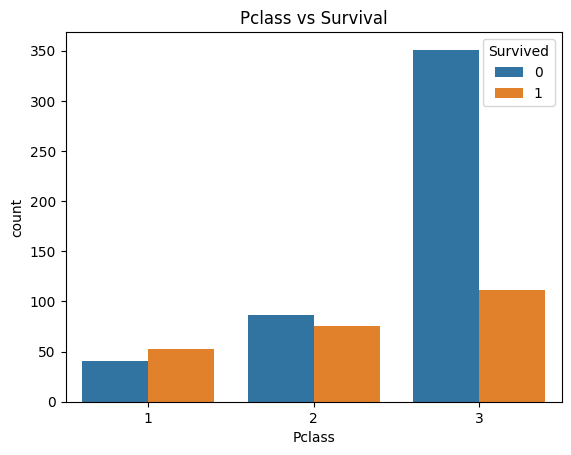

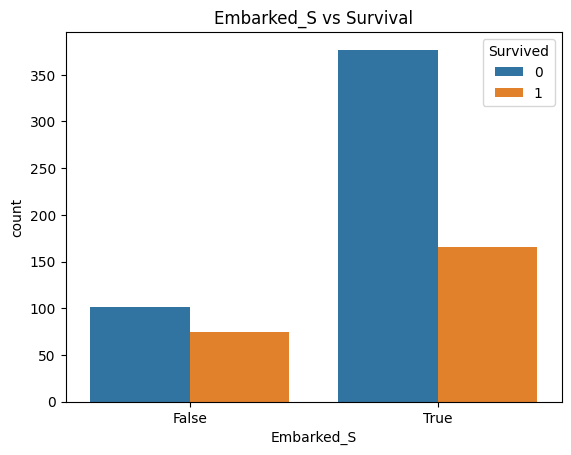

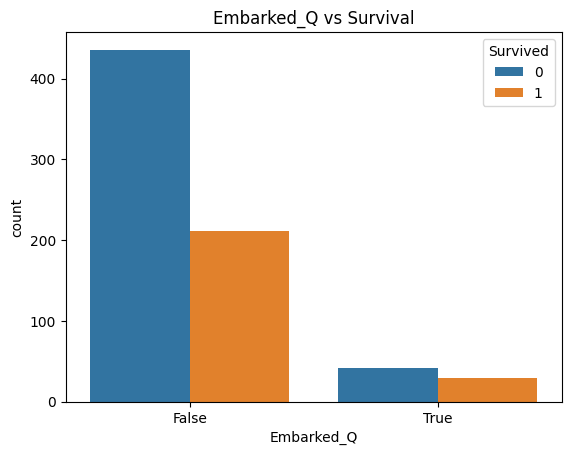

In [64]:
sns.countplot(x="Survived", data=df)
plt.title("Survival Distribution")
plt.show()

sns.countplot(x="Sex", hue="Survived", data=df)
plt.title("Sex vs Survival")
plt.show()

sns.countplot(x="Pclass", hue="Survived", data=df)
plt.title("Pclass vs Survival")
plt.show()

sns.countplot(x="Embarked_S", hue="Survived", data=df)
plt.title("Embarked_S vs Survival")
plt.show()

sns.countplot(x="Embarked_Q", hue="Survived", data=df)
plt.title("Embarked_Q vs Survival")
plt.show()

In [65]:
df['Fare_abs_scaled'] = df['Fare'].abs()

fig = px.scatter(df, x="Age", y="Fare", color="Survived",
                 size="Fare_abs_scaled", hover_data=["Sex", "Pclass"])
fig.show()